In [1]:
import imageio
import matplotlib.pyplot as plt
import skimage.color as color
import cv2
import numpy as np
import scipy

In [2]:
video = imageio.mimread('1472 semen-00.avi')

In [3]:
video[0].shape

(580, 780, 3)

In [4]:
video[0][:,:,0].shape

(580, 780)

In [5]:
image_bw = color.rgb2gray(video[0])*255

In [6]:
image_bw.astype(int)

array([[47, 48, 48, ..., 60, 60, 44],
       [48, 48, 51, ..., 60, 56, 40],
       [47, 48, 51, ..., 60, 56, 47],
       ...,
       [49, 48, 46, ..., 52, 56, 55],
       [52, 47, 43, ..., 52, 56, 60],
       [52, 47, 38, ..., 53, 58, 62]])

In [7]:
gray = cv2.cvtColor(video[0], cv2.COLOR_BGR2GRAY)

In [8]:
gray

array([[47, 48, 49, ..., 61, 61, 44],
       [48, 49, 51, ..., 61, 57, 40],
       [47, 49, 51, ..., 60, 56, 47],
       ...,
       [50, 49, 46, ..., 52, 56, 55],
       [52, 47, 43, ..., 52, 57, 61],
       [52, 47, 38, ..., 54, 58, 62]], dtype=uint8)

In [54]:
image_bw==gray

array([[False,  True, False, ..., False, False, False],
       [ True, False,  True, ..., False, False,  True],
       [False, False,  True, ...,  True,  True, False],
       ...,
       [False, False, False, ...,  True,  True,  True],
       [ True, False,  True, ...,  True, False, False],
       [ True, False,  True, ..., False,  True,  True]])

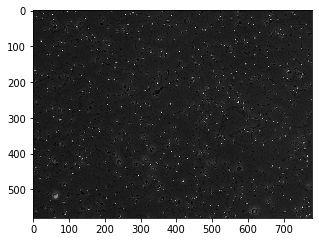

In [14]:
fig = plt.figure(figsize=(5,8))
plt.imshow(gray,cmap='gray')
plt.imsave('img_grises.jpeg',gray)

-1

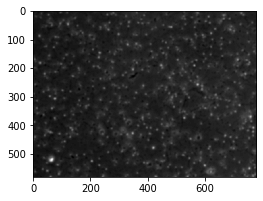

In [13]:
fig = plt.figure(figsize=(4,7))
gaussian1 = cv2.GaussianBlur(gray,(11,11),0)
gaussian2 = cv2.GaussianBlur(gaussian1,(11,11),0)
plt.imshow(gaussian2,cmap='gray')
cv2.imshow('a7',gaussian2)
cv2.waitKey(0)

In [16]:
laplacian = cv2.Laplacian(gaussian2,cv2.CV_64F)
cv2.imshow('a7',laplacian)
cv2.waitKey(0)

-1

In [41]:
# PRUEBAS LAPLACIANO

from scipy import ndimage, misc
result = ndimage.gaussian_laplace(gaussian2, sigma=0.9)

_, image_tresh = cv2.threshold(result,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
#image_steched = cv2.morphologyEx(image_tresh, cv2.MORPH_OPEN, np.ones((3,3),np.uint8))
image_dilated = cv2.dilate(result, np.ones((3,3),np.uint8), iterations = 1)
image_steched = cv2.morphologyEx(image_dilated, cv2.MORPH_OPEN, np.ones((3,3),np.uint8))


cv2.imshow('a1',image_tresh)
cv2.imshow('a2',result)
cv2.imshow('a3',image_steched)
cv2.imshow('a4',image_dilated)

cv2.waitKey(0)

-1

In [44]:
import numpy as np
import pandas as pd
from skimage.measure import label
import matplotlib.pyplot as plt


def detect_particles(seg_img):
    """
    Toma la imagen original y la segmentada como entrada, devuelve un dataframe con todas las partículas
    de la imagen y sus propidades.

    Parametros:
        seg_img (array(M,N)): imagen segmentada.

    Returns:
        particles (df(id, x, y, total_pixels, mask)): Dataframe con todas las partículas.
    """

    M = seg_img.shape[0]
    N = seg_img.shape[1]
    # Etiqueta cada partícula con un entero diferente
    labeled_img, total_particles = label(seg_img, connectivity=2, return_num=True)

    count = 0
    particles = pd.DataFrame(index=range(total_particles), columns=['id', 'x', 'y', 'total_pixels'])

    # Se recorren todos los pixeles de la imágen para hayar el centro geométrico de cada partícula haciendo
    # el promedio de sus coordenadas además se guardan el resto de las propiedades de las partículas
    for p in range(1, total_particles+1):
        particles.loc[p - 1, ['id']] = p
        coords_p = np.argwhere(labeled_img == p)
        particles.loc[p-1, ['x']] = np.mean(coords_p[:, 0])
        particles.loc[p-1, ['y']] = np.mean(coords_p[:, 1])
        particles.loc[p-1, ['total_pixels']] = coords_p.shape[0]

    return particles

In [45]:
particles = detect_particles(image_dilated)

In [47]:
particles

,id,x,y,total_pixels
0,1,1.5,96,20
1,2,2.41176,102.882,17
2,3,1.89474,119.421,19
3,4,2.75,278.75,24
4,5,3.41026,361.051,39
5,6,1.83333,365.333,18
6,7,1,391,9
7,8,0.5,519,2
8,9,1,520.333,3
9,10,1,521.333,3


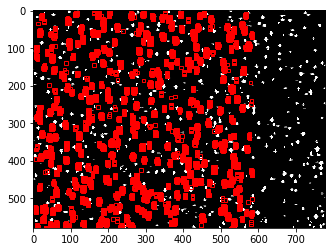

In [51]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np

im = image_dilated

# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(im,cmap='gray')

# Create a Rectangle patch
for it, row in particles.iterrows():
    rect = patches.Rectangle((particles.loc[it, "x"], particles.loc[it, "y"]),10,10,linewidth=1,edgecolor='r',facecolor='none')
    ax.add_patch(rect)


[[ 0  0 12 ... 16  0  0]
 [16 14 20 ... 32 16 16]
 [16 10 12 ... 48 32 32]
 ...
 [12  8 30 ... 32 12  4]
 [12 14 48 ... 16 16 28]
 [ 0 24 56 ...  0 40 48]]


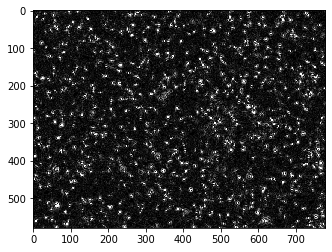

In [142]:
laplacian = cv2.Laplacian(gaussian1,cv2.CV_16S,ksize=5)
abs_dst = cv2.convertScaleAbs(laplacian)
print(abs_dst)
plt.imshow(abs_dst,cmap='gray')
#lap = np.uint8((laplacian - np.min(laplacian))/(np.max(laplacian)- np.min(laplacian))*255)
#plt.imshow(lap,cmap='gray')

(<matplotlib.axes._subplots.AxesSubplot at 0x2b33c58f400>,
 <matplotlib.image.AxesImage at 0x2b33c5cecc0>)

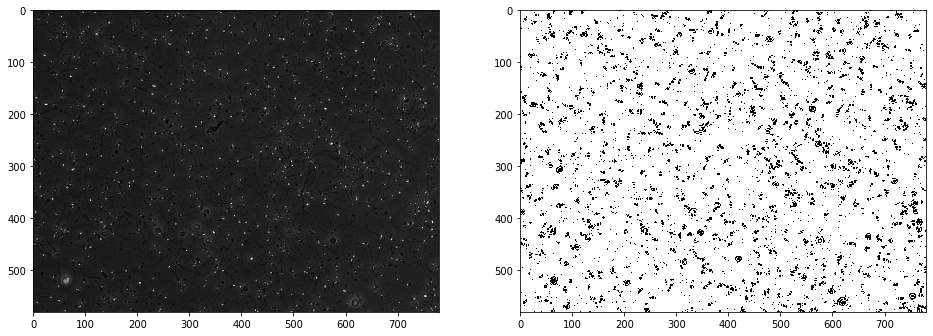

In [145]:
_, image_tresh = cv2.threshold(abs_dst,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
fig = plt.figure(figsize=(16,7))

plt.subplot(122),plt.imshow(lap>image_tresh,cmap='gray')
plt.subplot(121),plt.imshow(gray,cmap='gray')

(11, 11)


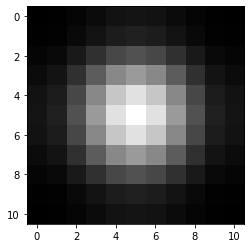

In [103]:
prueba = np.zeros((11,11))
prueba[5,5] = 1
k = (cv2.GaussianBlur(prueba,(11,11),0))
k_gray = color.rgb2gray(k)*255
print(k_gray.shape)
plt.imshow(k_gray,cmap='gray')
plt.imsave('resp_impulso.jpeg',k_gray)

In [ ]:
filtered_data = scipy.ndimage.filters.gaussian_filter(gray, sigma=s, truncate=t)

In [18]:
kernel = cv2.getGaussianKernel(11,11)
window = np.outer(kernel, kernel.transpose())

In [1]:
kernel = cv2.getGaussianKernel(11, 1)
window = np.outer(kernel, kernel.transpose())
mu1 = cv2.filter2D(gray, -1, window)[11:-11, 11:-11]  # valid
#fig = plt.figure(figsize=(20,15))
#plt.imshow(mu1,cmap='gray')

NameError: name 'cv2' is not defined